In [8]:
# prompt: load csv file

import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file
file_path = '/content/preprocessed_data.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Now you can work with the data in the DataFrame 'df'
print(df.head())  # Print the first few rows of the DataFrame



   Age  Gender Education Level  Tech Savviness  Hours Spent Online Daily  \
0   61    Male         College             6.0                  5.200000   
1   85  Female     High School             5.0                  2.700000   
2   65  Female        Graduate             6.0                  9.200000   
3   82  Female        Graduate             6.0                  1.100000   
4   80  Female        Graduate             6.0                  5.019149   

  Primary Device Used Social Media Usage  Email Awareness  Password Practices  \
0              Tablet                Yes                7                   2   
1              Tablet                Yes                7                   4   
2          Smartphone                Yes                8                   4   
3              Laptop                Yes                5                   3   
4              Laptop                Yes                6                   2   

  Two-Factor Authentication (2FA) Scam History Scam Type

### VISUALS

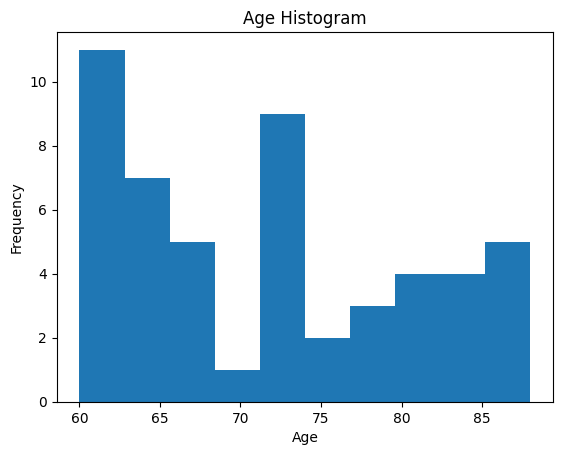

In [9]:
# prompt: histogram for age

import matplotlib.pyplot as plt

# Assuming 'age' is the column name containing age data
plt.hist(df['Age'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.show()


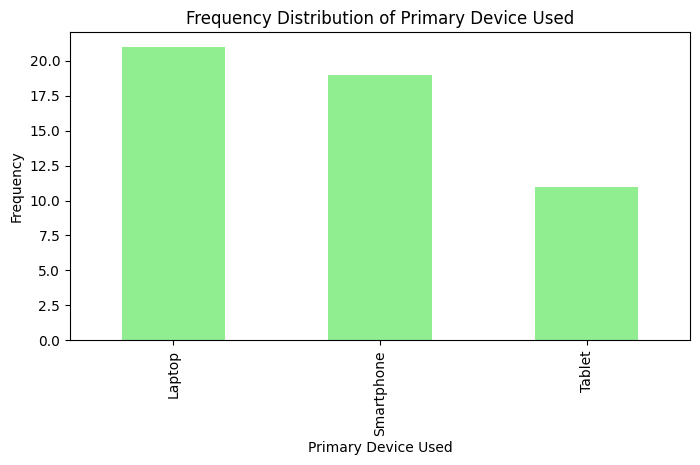

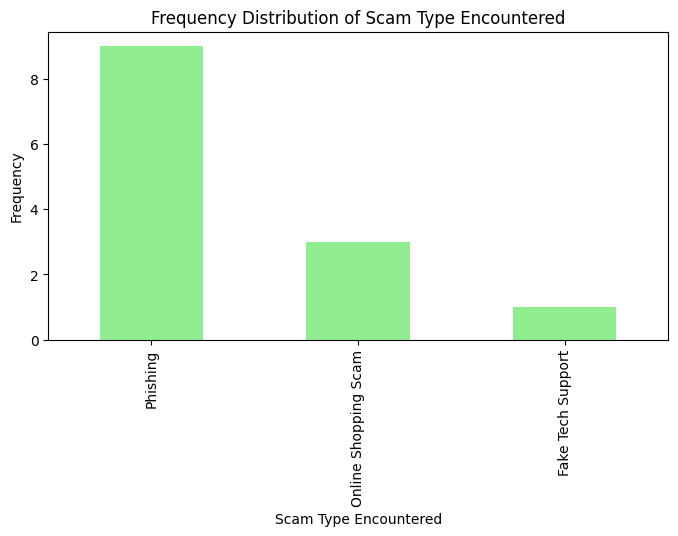

In [10]:
# Frequency distribution of categorical features
categorical_features = ["Primary Device Used", "Scam Type Encountered"]
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    df[feature].value_counts(dropna=True).plot(kind="bar", color="lightgreen") # dropna=True to ignore NaN
    plt.title(f"Frequency Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

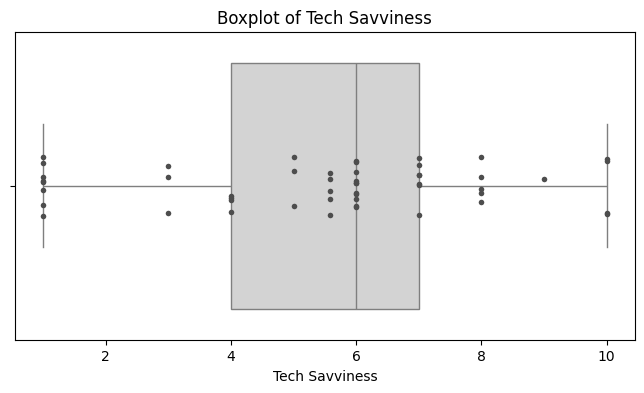

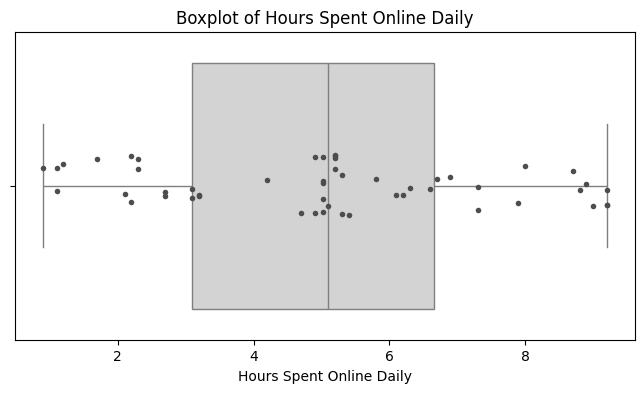

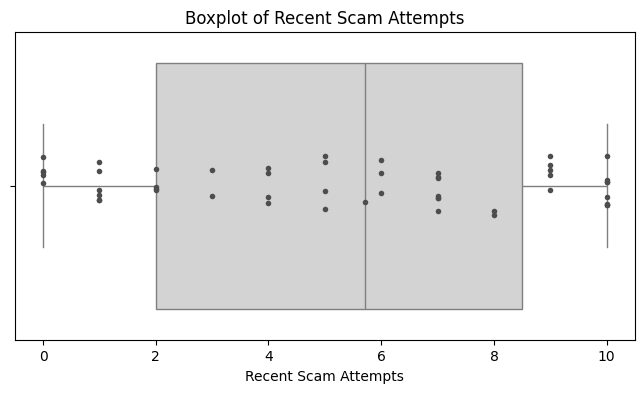

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical features with points overlaid
numerical_features = ["Tech Savviness", "Hours Spent Online Daily", "Recent Scam Attempts"]
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], color='lightgray')  # Create the boxplot
    sns.stripplot(x=df[feature], size=4, color='.3')  # Overlay points
    plt.title(f"Boxplot of {feature}")
    plt.show()

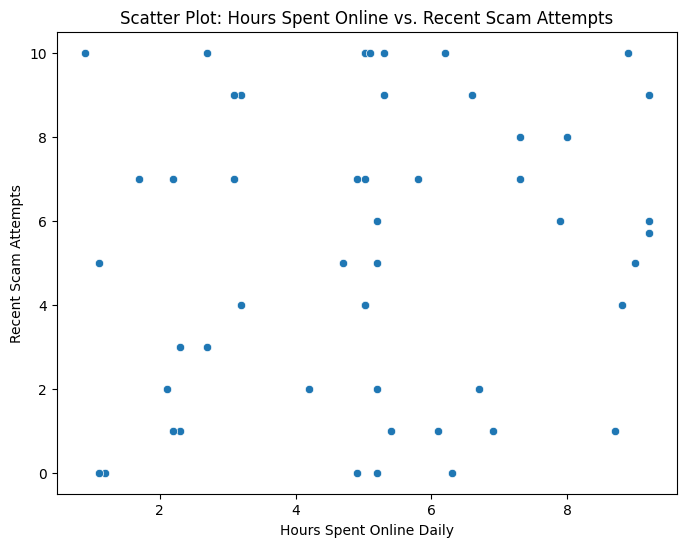

In [12]:
# Scatter plot of "Hours Spent Online Daily" vs. "Recent Scam Attempts"
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Hours Spent Online Daily"], y=df["Recent Scam Attempts"])
plt.title("Scatter Plot: Hours Spent Online vs. Recent Scam Attempts")
plt.xlabel("Hours Spent Online Daily")
plt.ylabel("Recent Scam Attempts")
plt.show()

Number of duplicate rows: 0


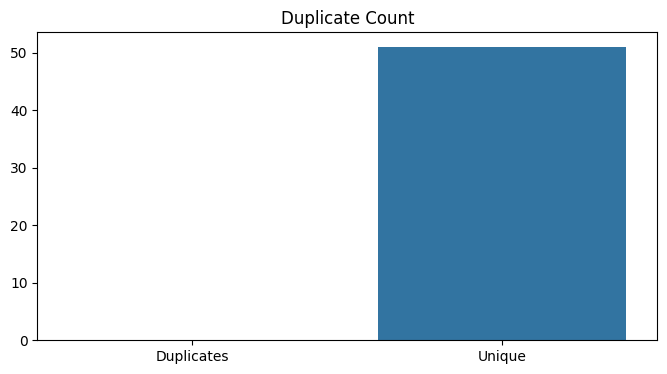

In [13]:
# Detect and visualize duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display a few duplicate rows
if not duplicate_rows.empty:
    print("Sample duplicate rows:")
    print(duplicate_rows.head())

# Plot duplicate counts (if any)
plt.figure(figsize=(8, 4))
sns.barplot(x=["Duplicates", "Unique"], y=[len(duplicate_rows), len(df) - len(duplicate_rows)])
plt.title("Duplicate Count")
plt.show()

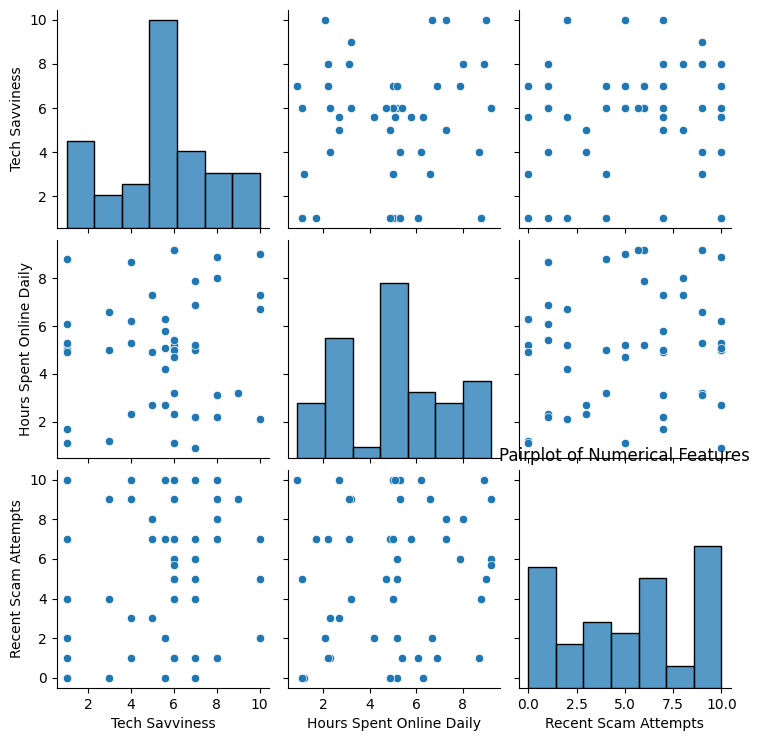

In [14]:
sns.pairplot(df[numerical_features].dropna())
plt.title("Pairplot of Numerical Features")
plt.show()

### ML

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define features and target
X = df.drop(columns=["Online Safety"])  # Replace 'Target' with your actual target column name
y = df["Online Safety"]  # Replace with your target column

# Create a LabelEncoder for categorical features
categorical_features = X.select_dtypes(include=['object']).columns # Select columns with 'object' dtype
encoder = LabelEncoder()

# Apply Label Encoding to categorical features
for feature in categorical_features:
    X[feature] = encoder.fit_transform(X[feature])
    # Fit and transform on the entire dataset to ensure consistent encoding across train/test sets

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression - Accuracy: 0.8181818181818182


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate the model
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest - Accuracy: 1.0
Confusion Matrix:
 [[2 0 0]
 [0 5 0]
 [0 0 4]]
Classification Report:
               precision    recall  f1-score   support

    Moderate       1.00      1.00      1.00         2
    Not Safe       1.00      1.00      1.00         5
        Safe       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [19]:
# prompt: i want to run a decision tree model on the same

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Define features (X) and target (y)
X = df.drop(columns=["Online Safety"])
y = df["Online Safety"]

# Encode categorical features
categorical_features = X.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for feature in categorical_features:
    X[feature] = encoder.fit_transform(X[feature])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree - Accuracy: 1.0
Confusion Matrix:
 [[2 0 0]
 [0 5 0]
 [0 0 4]]
Classification Report:
               precision    recall  f1-score   support

    Moderate       1.00      1.00      1.00         2
    Not Safe       1.00      1.00      1.00         5
        Safe       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

